In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
with open("results.txt", "r") as f:
    trials = f.readlines()
    trials = sorted(trials, key=lambda l: int(l.split(":")[1]))

In [3]:
import random

data = []

envs = set()

for trial in trials:
    s = trial.split(":")

    env = int(s[0])

    while env in envs:
        env = random.randint(0, 9999)
    step = int(s[1])
    dist = float(s[2])
    collisions = int(s[3])

    data.append([env, step, dist, collisions])

    envs.add(env)

found = np.array(list(filter(lambda x: x[1] != -1, data)))
failed = np.array(
    sorted(list(filter(lambda x: x[1] == -1, data)), key=lambda x: int(x[0]))
)
all = np.array(data)

NUM_TRIALS = len(all)
NUM_FOUND = len(found)
NUM_FAILED = len(failed)

[]

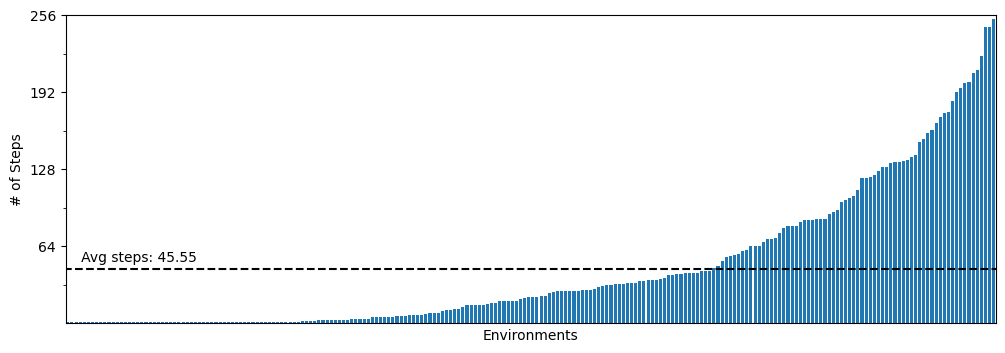

In [5]:
mean_steps = float(np.mean(found[:, 1]))

f = plt.figure(figsize=(12, 4))


b = plt.bar(list(map(lambda x: str(int(x)), found[:, 0])), found[:, 1], width=0.75)
plt.hlines(
    mean_steps, -1, NUM_FOUND, colors="k", linestyles="--", label=f"Avg{mean_steps}"
)
plt.text(0, mean_steps + 3, f"   Avg steps: {mean_steps:.2f}", ha="left", va="bottom")
plt.ylim([0, 256])
# plt.xlim(-0.5, NUM_FOUND - 0.5)
plt.xlim(-0.5, NUM_FOUND - 0.5)
plt.yticks([64, 128, 192, 256])
plt.yticks([32, 96, 160, 224], minor=True)
# plt.title("Distribution of # of Steps to find Intruder")
plt.xlabel("Environments")
plt.ylabel("# of Steps")

f.axes[0].get_xaxis().set_ticks([])

226 174


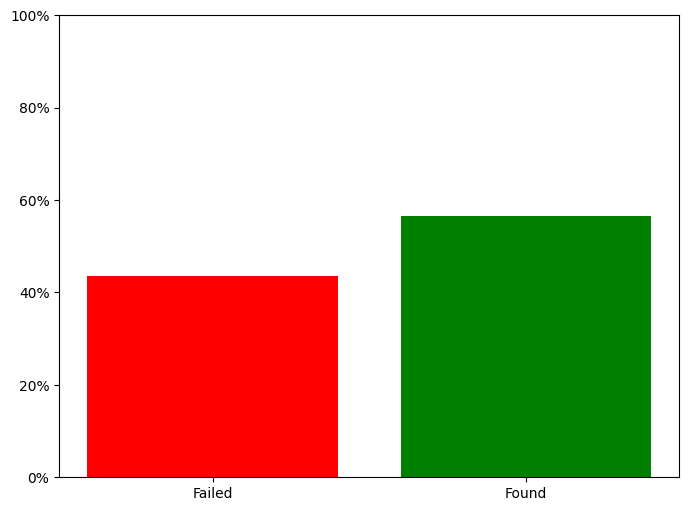

In [6]:
import matplotlib.ticker as mtick

fig = plt.figure(figsize=(8, 6))
plt.bar(
    ["Failed", "Found"],
    [NUM_FAILED / NUM_TRIALS * 100, NUM_FOUND / NUM_TRIALS * 100],
    color=["r", "g"],
)
fig.axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.title("Percent of trials where intruder was found")
plt.ylim([0, 100])
print(NUM_FOUND, NUM_FAILED)

3.2581427544594335 6.170375619845774


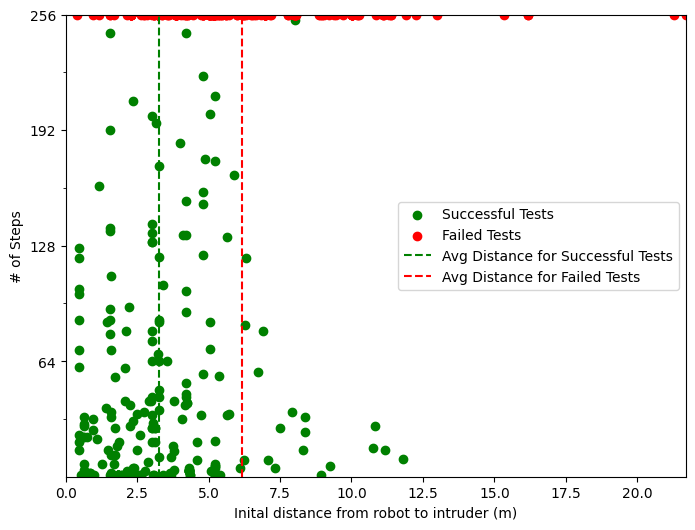

In [7]:
found_dist = np.mean(found[:, 2])
failed_dist = np.mean(failed[:, 2])

plt.figure(figsize=(8, 6))
plt.scatter(found[:, 2], found[:, 1], color="g")
plt.scatter(failed[:, 2], np.array([256] * NUM_FAILED), color="r")
plt.vlines(found_dist, 0, 256, colors="g", linestyles="--")
plt.vlines(failed_dist, 0, 256, colors="r", linestyles="--")
plt.ylim([0, 256])
plt.xlim([0, max(max(failed[:, 2]), max(found[:, 2]))])
plt.yticks([64, 128, 192, 256])
plt.yticks([32, 96, 160, 224], minor=True)
# plt.title("Steps to find intruder vs. Initial distance from robot to intruder")
plt.xlabel("Inital distance from robot to intruder (m)")
plt.ylabel("# of Steps")
plt.legend(
    [
        "Successful Tests",
        "Failed Tests",
        "Avg Distance for Successful Tests",
        "Avg Distance for Failed Tests",
    ],
    loc="center right",
)
print(np.mean(found[:, 2]), np.mean(failed[:, 2]))

[]

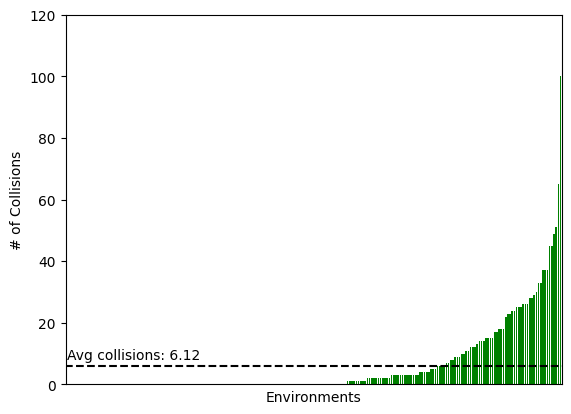

In [8]:
by_collision = np.array(sorted(found, key=lambda x: x[3]))
mean_collisions = float(np.mean(by_collision[:, 3]))

f = plt.figure()

plt.bar(list(map(lambda x: str(int(x)), by_collision[:, 0])), by_collision[:, 3], color='g', width=0.75)
plt.hlines(mean_collisions, -1, NUM_FOUND, colors="k", linestyles="--")
plt.text(
    0,
    mean_collisions + 1,
    f"Avg collisions: {mean_collisions:.2f}",
    ha="left",
    va="bottom",
)
plt.ylim([0, max(int(max(by_collision[:, 3]) * 1.2), 1)])
plt.xlim(-0.5, NUM_FOUND - 0.5)
# plt.yticks([64,128,192,256])
# plt.yticks([32,96,160,224], minor=True)
# plt.title("Distribution of # of Collisions for Successful Tests")
plt.xlabel("Environments")
plt.ylabel("# of Collisions")

f.axes[0].get_xaxis().set_ticks([])

[]

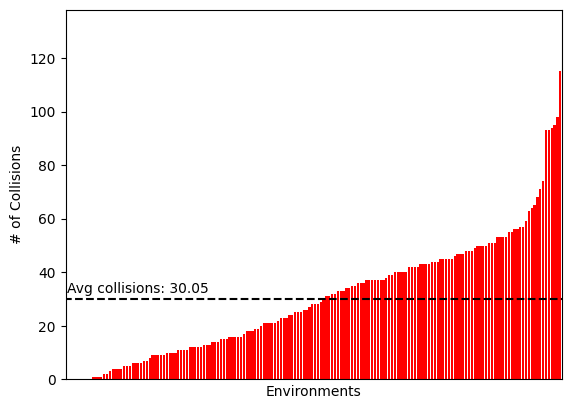

In [9]:
by_collision = np.array(sorted(failed, key=lambda x: x[3]))
mean_collisions = float(np.mean(by_collision[:, 3]))

f = plt.figure()

plt.bar(
    list(map(lambda x: str(int(x)), by_collision[:, 0])), by_collision[:, 3], color="r"
)
plt.hlines(mean_collisions, -1, NUM_FAILED, colors="k", linestyles="--")
plt.text(
    0,
    mean_collisions + 1,
    f"Avg collisions: {mean_collisions:.2f}",
    ha="left",
    va="bottom",
)
plt.ylim([0, int(max(by_collision[:, 3]) * 1.2)])
plt.xlim(-0.5, NUM_FAILED - 0.5)
# plt.yticks([64,128,192,256])
# plt.yticks([32,96,160,224], minor=True)
# plt.title("Distribution of # of Collisions for Failed Tests")
plt.xlabel("Environments")
plt.ylabel("# of Collisions")

f.axes[0].get_xaxis().set_ticks([])

[]

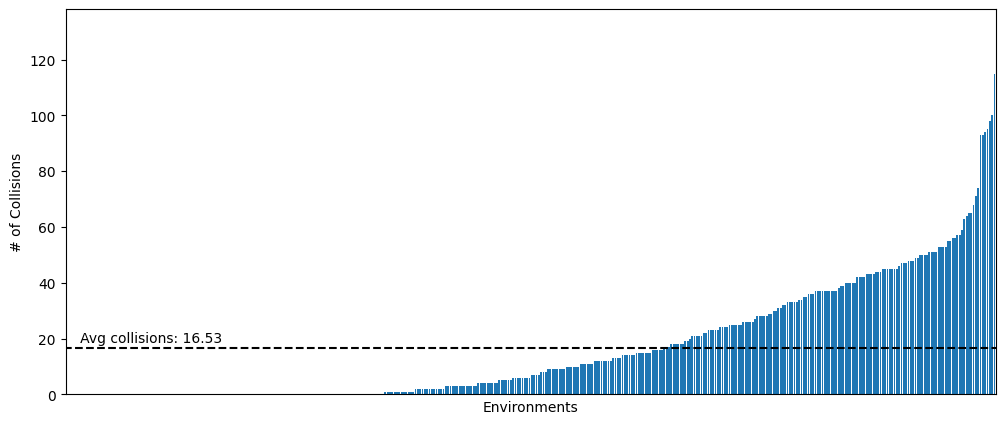

In [10]:
by_collision = np.array(sorted(all, key=lambda x: x[3]))
mean_collisions = float(np.mean(by_collision[:, 3]))

f = plt.figure(figsize=(12, 5))

plt.bar(
    list(map(lambda x: str(int(x)), by_collision[:, 0])), by_collision[:, 3], width=0.8
)
plt.hlines(mean_collisions, -1, NUM_TRIALS, colors="k", linestyles="--")
plt.text(
    0,
    mean_collisions + 1,
    f"   Avg collisions: {mean_collisions:.2f}",
    ha="left",
    va="bottom",
)
plt.ylim([0, int(max(by_collision[:, 3]) * 1.2)])
plt.xlim(-0.5, NUM_TRIALS - 0.5)
# plt.title("Distribution of # of Collisions for All Tests")
plt.xlabel("Environments")
plt.ylabel("# of Collisions")

f.axes[0].get_xaxis().set_ticks([])